# Randomized Image Sampling for Explanations (RISE)

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize as resize1
from tqdm import tqdm
import tensorflow as tf
import tensorflow.keras as keras
import gym
import tensorforce
from tensorforce import Agent, Environment

from PIL import Image
import torchvision.transforms as T
import torch

import math
import random
import numpy as np

C:\Anaconda\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [2]:
import retro
import time
from tensorforce import Agent, Environment

## Cargar agente y definición de entorno

In [3]:
agent = Agent.load(directory='DQN-ATARI-VISION-GRAYSCALE-HALF-COMPLETO')

In [5]:
env = gym.make('SpaceInvaders-v0')
environment = Environment.create(environment=env)

In [6]:
meanings = env.unwrapped.get_action_meanings()

210


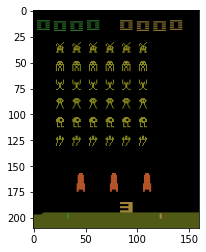

In [7]:
agent.tracked_tensors()
states = environment.reset()
print(states.shape[0])
img_ = Image.fromarray(states, 'RGB')
plt.imshow(img_)

## Métodos específicos RISE

In [8]:
def generate_masks(N, s, p1, dimx, dimy):
    cell_size = np.ceil(np.array((dimx,dimy)) / s) # si dividimos en s "cachos" dim entera
    up_size = (s + 1) * cell_size # si cupiese uno mas dim
    
    grid = np.random.rand(N, s, s) < p1 #generar cuadrado s * s con 0 o 1
    grid = grid.astype('float32')
    masks = np.empty((N, dimx,dimy)) #lo rellenaremos

    for i in tqdm(range(N), desc='Generating masks'):
        # Random shifts
        x = np.random.randint(0, cell_size[0]) #cuando shift en x
        y = np.random.randint(0, cell_size[1]) #cuanto shift en y
        # Linear upsampling and cropping
        masks[i, :, :] = resize1(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + dimx, y:y + dimy]
        
    masks = masks.reshape(-1, dimx,dimy , 1)
    return masks

In [9]:
def explain(inp, masks , agent, dimx, dimy):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    
    for i in tqdm(range (0,N), desc = 'Explaining'):
        decision = agent.act(states=masked[i], independent = True, deterministic = True)
        elem = agent.tracked_tensors()['agent/policy/action-values']
        softmax = tf.nn.softmax(elem).numpy()
        preds.append(softmax)
    
    preds = np.array(preds)
    

    sal = preds.T.dot(masks.reshape(N, -1)).reshape(-1, dimx,dimy)
    sal = sal / N / p1
    return sal


In [10]:
def saliency(class_idx,img, sal):
    plt.title('Explanation for `{}`'.format(meanings[class_idx]))
    plt.axis('off')
    plt.imshow(img)
    plt.imshow(sal[class_idx], cmap='jet', alpha=0.5)
    plt.show()

## Creación de la explicación

In [11]:
states = environment.reset()
terminal = False
#constantes generacion mascaras
N = 2000
s = 8
p1 = 0.9
masks = generate_masks(N, s, p1,states.shape[0],states.shape[1])

Generating masks: 100%|███████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 416.59it/s]


Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.48it/s]


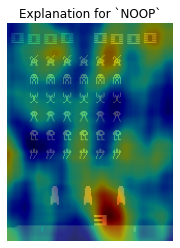

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.24it/s]


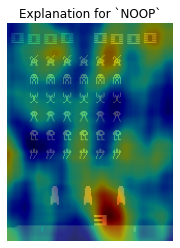

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.04it/s]


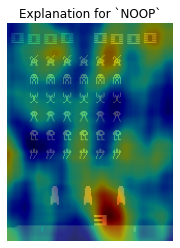

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.35it/s]


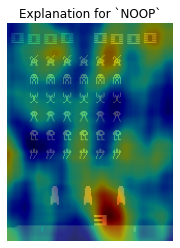

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.57it/s]


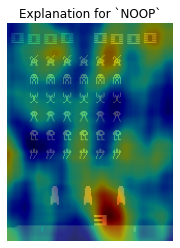

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.78it/s]


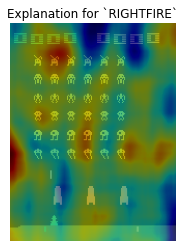

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.62it/s]


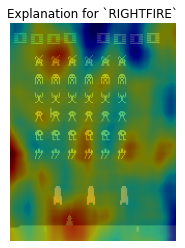

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.60it/s]


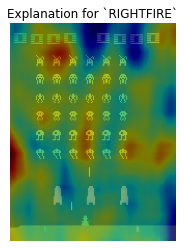

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.20it/s]


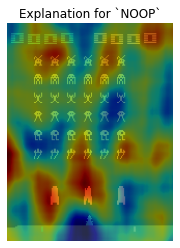

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.44it/s]


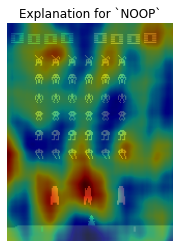

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.39it/s]


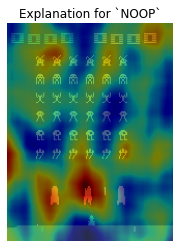

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.52it/s]


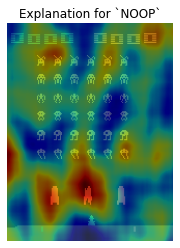

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 80.37it/s]


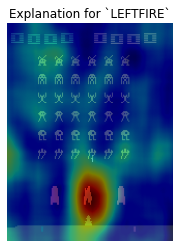

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.62it/s]


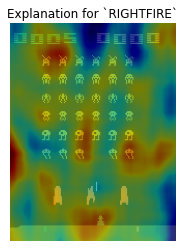

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.18it/s]


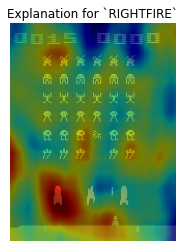

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.38it/s]


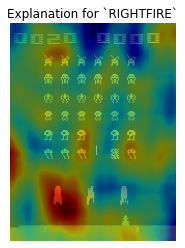

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.43it/s]


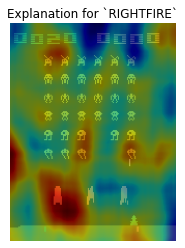

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.40it/s]


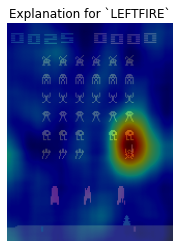

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.40it/s]


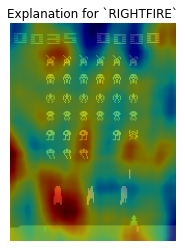

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 83.25it/s]


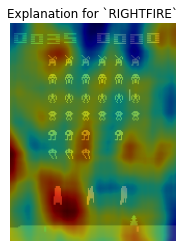

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.31it/s]


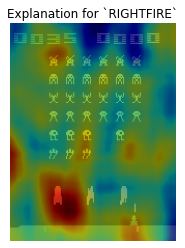

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.42it/s]


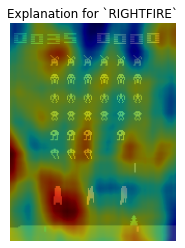

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.89it/s]


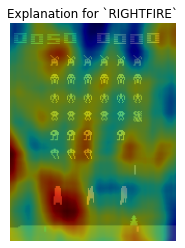

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.70it/s]


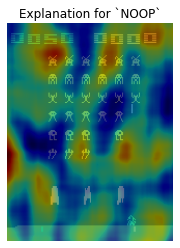

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 80.81it/s]


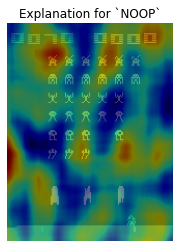

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.94it/s]


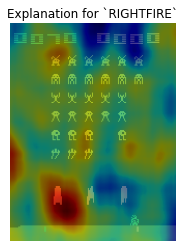

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.55it/s]


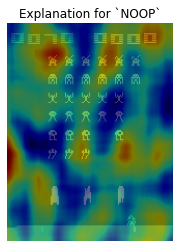

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.74it/s]


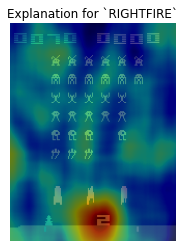

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.07it/s]


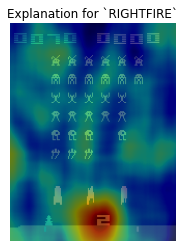

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.26it/s]


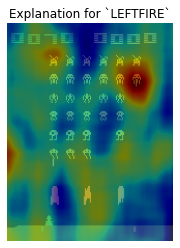

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.69it/s]


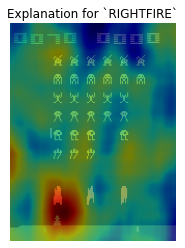

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.06it/s]


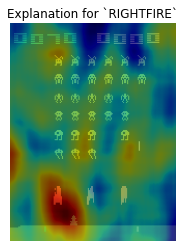

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.41it/s]


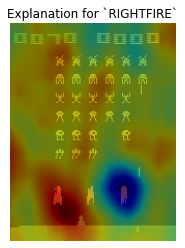

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.85it/s]


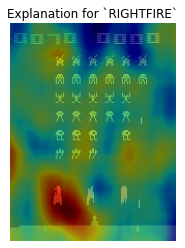

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.44it/s]


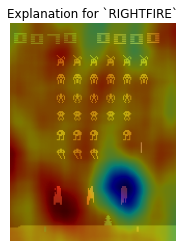

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.91it/s]


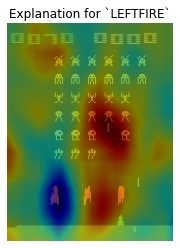

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.64it/s]


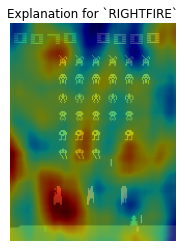

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.70it/s]


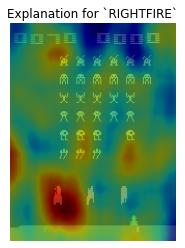

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 80.16it/s]


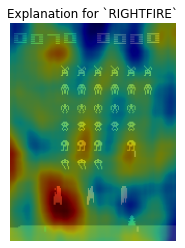

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:25<00:00, 77.57it/s]


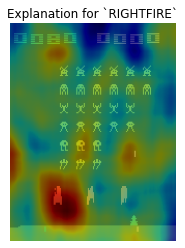

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 80.31it/s]


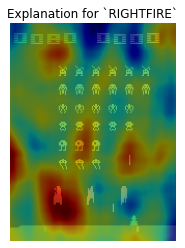

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.49it/s]


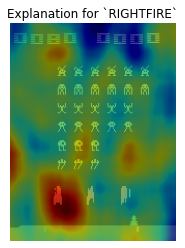

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.22it/s]


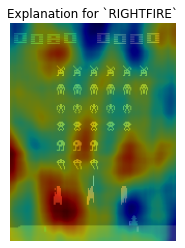

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.50it/s]


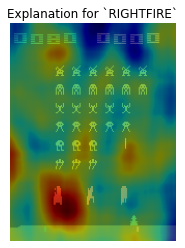

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.33it/s]


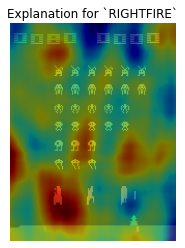

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 83.32it/s]


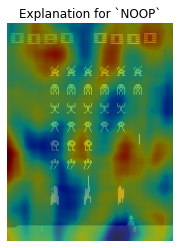

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.16it/s]


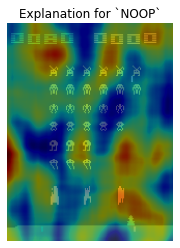

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.46it/s]


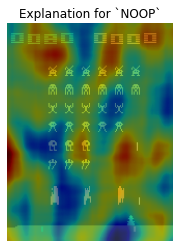

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.09it/s]


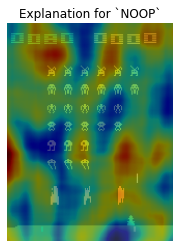

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 81.98it/s]


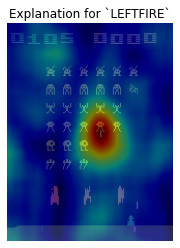

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.05it/s]


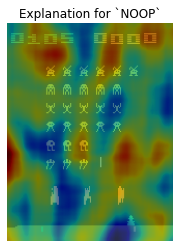

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:23<00:00, 83.76it/s]


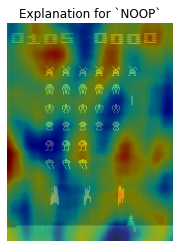

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.34it/s]


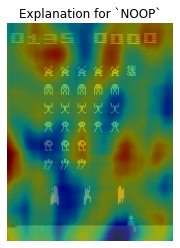

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.93it/s]


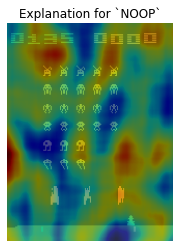

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.64it/s]


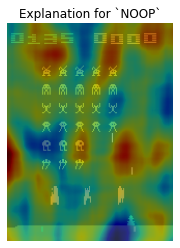

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.25it/s]


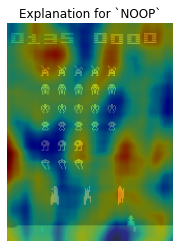

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.31it/s]


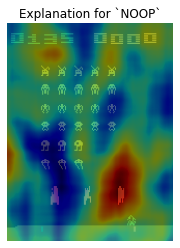

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.72it/s]


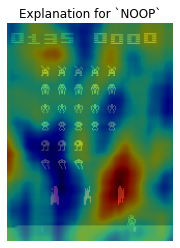

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.27it/s]


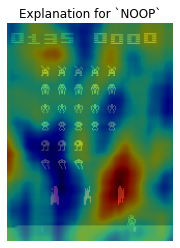

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.13it/s]


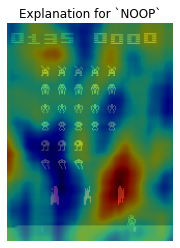

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 80.98it/s]


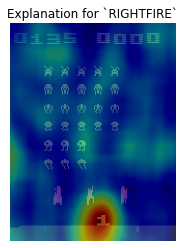

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.42it/s]


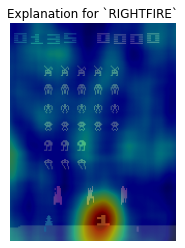

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.26it/s]


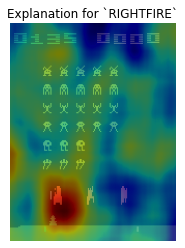

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.90it/s]


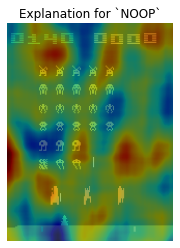

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.30it/s]


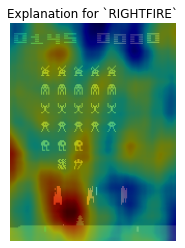

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.11it/s]


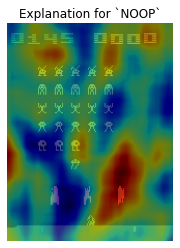

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.23it/s]


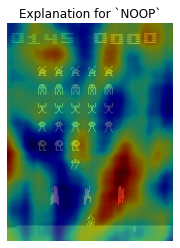

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.24it/s]


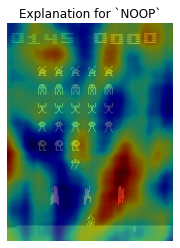

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.21it/s]


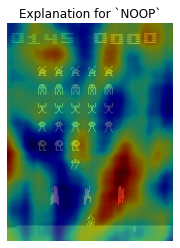

Explaining: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 82.26it/s]


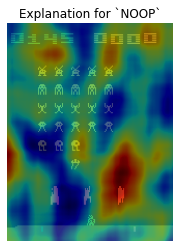

In [12]:
i=0
while(not terminal):
    img = Image.fromarray(states, 'RGB')
    actions = agent.act(states=states, independent = True, deterministic = True)
    if i % 10 == 0:
        sal = explain(states, masks , agent,states.shape[0],states.shape[1])
        saliency(actions,img,sal)
    states, terminal, reward = environment.execute(actions=actions)
    i = i+1

In [ ]:
environment.close()